# Polytest 1
This macro is testing the "compacting" algorithm in TPadPainter.
It reduces the number of polygon's vertices using actual pixel coordinates.


It's not really useful, but just to test that the resulting polygon
is still reasonable. Initial number of points is 1000000, after "compression"
it's 523904 (with default canvas size, before you tried to resize it) - so almost half of
vertices were removed but you can still see the reasonable shape. If you resize
a canvas to a smaller size, the number of vertices after compression can be something like 5000 and even less.
It's easy to 'fool' this algorithm though in this particular case (ellipse is a kind of fringe case,
you can easily have a sequence of almost unique vertices (at a pixel level).




**Author:** Timur Pocheptsov  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:43 AM.</small></i>

Includes for aclic.

In [1]:
%%cpp -d
#include <cassert>
#include <vector>

#include "TRandom.h"
#include "TCanvas.h"
#include "TError.h"
#include "Rtypes.h"
#include "TNamed.h"
#include "TMath.h"

class PolyTest1 : public TNamed, public TAttLine, public TAttFill {
public:
   PolyTest1(unsigned nVertices);

   void Paint(const Option_t *notUsed);
   void Reset(unsigned nVertices);

private:
   enum {
      kNPointsDefault = 10000//minimal number of points.
   };

   std::vector<Double_t> fXs;
   std::vector<Double_t> fYs;
};


PolyTest1::PolyTest1(unsigned nVertices)
               : TNamed("polygon_compression_test1", "polygon_compression_test1")
{
   Reset(nVertices);
}

 _____________________________________________________________
 

In [2]:
%%cpp -d
void PolyTest1::Reset(unsigned nVertices)
{
   //Some canvas must already exist by this point.
   assert(gPad != 0 && "Reset, gPad is null");
   //We need a gRandom to exist.
   assert(gRandom != 0 && "Reset, gRandom is null");

   if (nVertices < kNPointsDefault) {
      Warning("Reset", "resetting nVertices parameter to %u", unsigned(kNPointsDefault));
      nVertices = kNPointsDefault;
   }

   fXs.resize(nVertices);
   fYs.resize(nVertices);

   Double_t xMin = 0., xMax = 0., yMin = 0., yMax = 0.;
   gPad->GetRange(xMin, yMin, xMax, yMax);
   assert(xMax - xMin > 0 && yMax - yMin > 0 && "Reset, invalid canvas' ranges");

   const Double_t xCentre = xMin + 0.5 * (xMax - xMin);
   const Double_t yCentre = yMin + 0.5 * (yMax - yMin);

   const Double_t r = TMath::Min(xMax - xMin, yMax - yMin) * 0.8 / 2;
   const Double_t angle = TMath::TwoPi() / (nVertices - 1);

   for (unsigned i = 0; i < nVertices - 1; ++i) {
      const Double_t currR = r + gRandom->Rndm() * r * 0.01;
      fXs[i] = xCentre + currR * TMath::Cos(angle * i);
      fYs[i] = yCentre + currR * TMath::Sin(angle * i);
   }

   fXs[nVertices - 1] = fXs[0];
   fYs[nVertices - 1] = fYs[0];
}

 _____________________________________________________________
 

In [3]:
%%cpp -d
void PolyTest1::Paint(const Option_t * /*notUsed*/)
{
   assert(gPad != 0 && "Paint, gPad is null");

   TAttFill::Modify();
   gPad->PaintFillArea((Int_t)fXs.size(), &fXs[0], &fYs[0]);

   TAttLine::Modify();
   gPad->PaintPolyLine((Int_t)fXs.size(), &fXs[0], &fYs[0]);
}

In [4]:
TCanvas * const cnv = new TCanvas;
cnv->cd();

PolyTest1 * polygon = new PolyTest1(1000000);
polygon->SetLineColor(kBlue);
polygon->SetFillColor(kRed);
polygon->SetLineWidth(1);
polygon->Draw();//Attach a polygon to a canvas.

Draw all canvases 

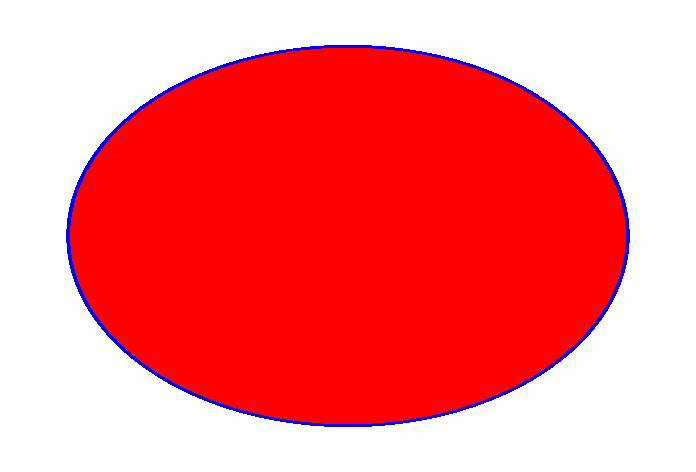

In [5]:
gROOT->GetListOfCanvases()->Draw()